In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Veri Okuma

In [4]:
dataFrame = pd.read_csv('maaslar.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


Veriyi Anlamak

In [5]:
dataFrame.describe() ## Verinin istatistikleri

,Egitim Seviyesi,maas
count,10.00000,10.000000
mean,5.50000,12475.000000
std,3.02765,14968.694183
min,1.00000,2250.000000
25%,3.25000,3250.000000
50%,5.50000,6500.000000
75%,7.75000,13750.000000
max,10.00000,50000.000000


In [6]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

unvan              0
Egitim Seviyesi    0
maas               0
dtype: int64

Grafiksel Analiz

<AxesSubplot:xlabel='Egitim Seviyesi', ylabel='maas'>

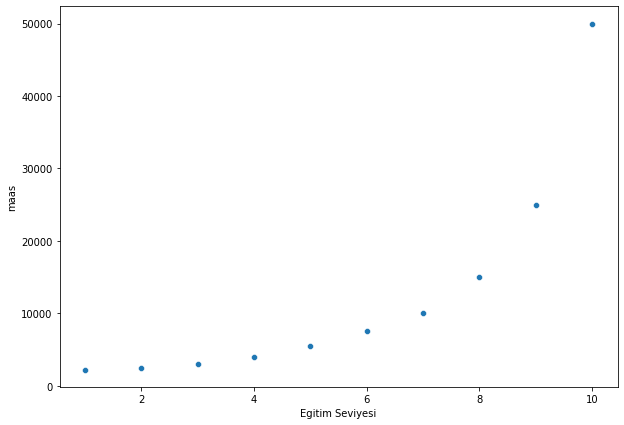

In [7]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='Egitim Seviyesi',y='maas',data=dataFrame) ## Noktasal grafik

Model Oluşturma

In [8]:
y = dataFrame.iloc[:,2:3].values ## Maas
x = dataFrame.iloc[:,1:2].values ## Egitim seviyesi

Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linearRegression = LinearRegression() ## LinearRegression ile öğrenme
linearRegression.fit(x,y)

LinearRegression()

In [11]:
guess = linearRegression.predict(x) ## x_teste göre tahmin
guess ## Tahmin verisi

array([[-5722.72727273],
       [-1678.78787879],
       [ 2365.15151515],
       [ 6409.09090909],
       [10453.03030303],
       [14496.96969697],
       [18540.90909091],
       [22584.84848485],
       [26628.78787879],
       [30672.72727273]])

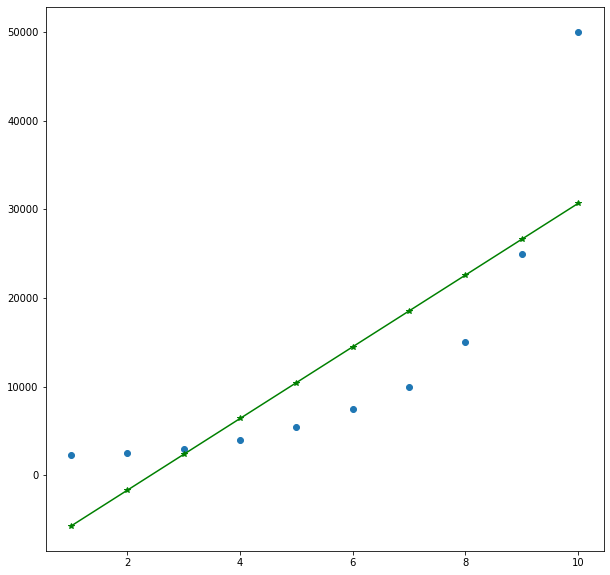

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,guess,'g-*')

Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
polyReg = PolynomialFeatures(degree = 2) ## 2.dereceden
x_poly = polyReg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [15]:
linearRegression1 = LinearRegression()
linearRegression1.fit(x_poly,y)

LinearRegression()

In [16]:
guess = linearRegression1.predict(x_poly) ## x_teste göre tahmin
guess ## Tahmin verisi

array([[ 5936.36363636],
       [ 2207.57575758],
       [  421.96969697],
       [  579.54545455],
       [ 2680.3030303 ],
       [ 6724.24242424],
       [12711.36363636],
       [20641.66666667],
       [30515.15151515],
       [42331.81818182]])

R2 değeri: Algoritmanın başarı oranı denebilir.0 en kötü 1 en iyi

In [24]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y,guess)

0.9162082221443942

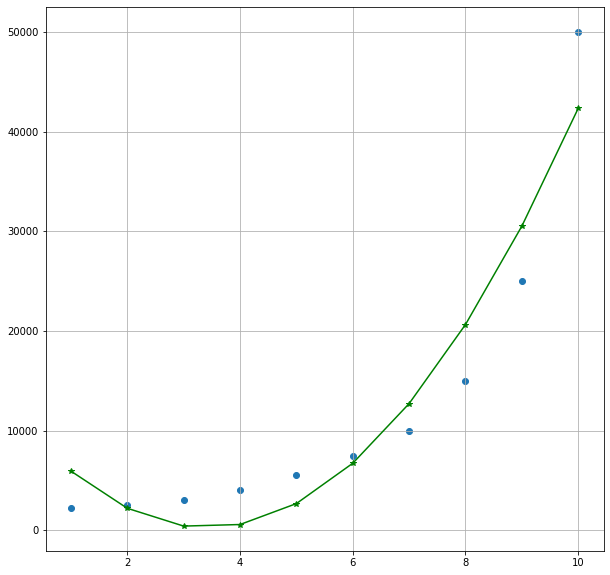

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,guess,'g-*')
plt.grid()

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
polyReg1 = PolynomialFeatures(degree = 4) ## 4.dereceden
x_poly = polyReg1.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [31]:
linearRegression2 = LinearRegression()
linearRegression2.fit(x_poly,y)

LinearRegression()

In [32]:
guess = linearRegression2.predict(x_poly) ## x_teste göre tahmin
guess ## Tahmin verisi

array([[ 2667.83216783],
       [ 1587.99533799],
       [ 2932.1095571 ],
       [ 4731.64335664],
       [ 6086.24708625],
       [ 7163.75291375],
       [ 9200.17482518],
       [14499.70862471],
       [26434.73193474],
       [49445.80419581]])

R2 değeri

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y,guess)

0.9973922891706614

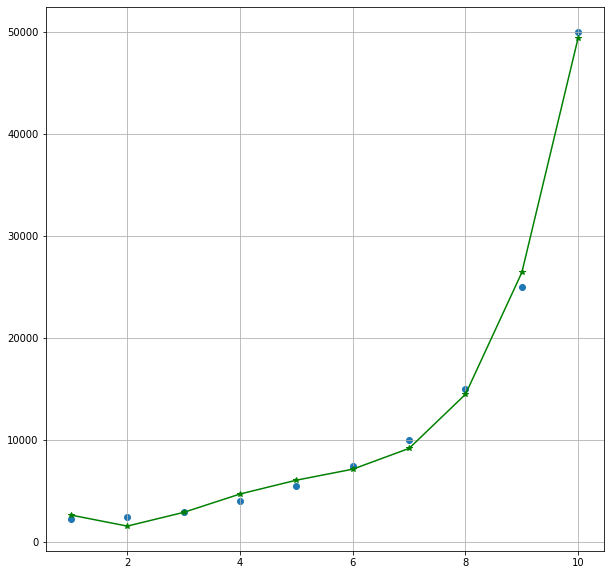

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,guess,'g-*')
plt.grid()

Tahmin

In [97]:
linearRegression.predict([[7]])

array([[18540.90909091]])

In [98]:
linearRegression1.predict(polyReg.fit_transform([[7]]))

array([[12711.36363636]])

In [99]:
linearRegression2.predict(polyReg1.fit_transform([[7]]))

array([[9200.17482518]])